# Mathematics in AI MS0240 
## Assignment 1
### Question 2

#### Name: Choo Weng Yan
#### Class: DIT/FT/2A/14


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [39]:
data = pd.read_csv("iris.csv")
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


#### (a) Produce scatterplot for each pair of the variables.  You may produce a scatterplot matrix using pairplot from Seaborn library, or simply individual scatterplots using scatter from Matplotlib.  Either way, use colour or marker to display ‘class’ information.  Comment on how the irises can be distinguished and identified from your plot(s). 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


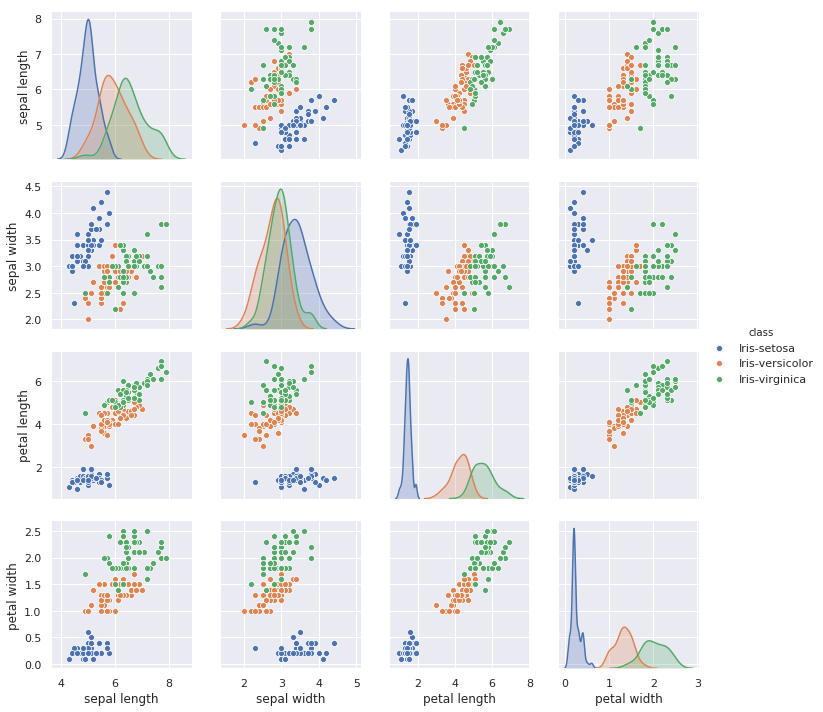

In [4]:
sns.pairplot(data, hue = 'class')

Based on the pairplot above, the irises can be distinguished and identified by the color of the class, where blue color dots represent Iris-setosa species while orange color dots represent Iris-versicolor species and green color dots represent Iris-virginica species. 

#### (b) Should PCA be carried out on covariance or correlation matrix?  Explain. 

PCA should be carried out on correlation matrix. This is because the variables in the dataset have the same unit of measurement where the length and the width of the sepals and petals four variables were measured in centimeters but they have different scale/magnitude.

#### (c) Extract the principal components.  Justify your decision and interpret the principal components.  You should include the necessary tables, outputs and graphs.

In [41]:
data_reduced = data.drop(['class'], axis=1)
data_reduced.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
#scaling the data before PCA 
#standardized the variables -> Z values 

from sklearn.preprocessing import scale 
data_reduced=pd.DataFrame(scale(data_reduced),columns=['sepal length','sepal width','petal length','petal width'])
data_reduced.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [43]:
# implementing PCA using sklearn

from sklearn.decomposition import PCA

#generate the maximum number of PCs = 7 variables in the data
# and fit in the standardized data
pca = PCA(n_components=4).fit(data_reduced)

#Note that pca.transform() returns PCA scores based on centred data (fits in the standardized data)
#using attribute 'transformed' -- CENTERED DATA 
pca_samples = pca.transform(data_reduced)

In [44]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the eigenvalues, % variance explained, cumulative % variance explained and PCs

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions
    
    #PCA cumulative variance explained 
    cum_ratios=pca.explained_variance_ratio_.cumsum().reshape(len(pca.components_),1)
    cum_variance_ratios=pd.DataFrame(np.round(cum_ratios,4),columns=['Cumulative Explained Variance'])
    cum_variance_ratios.index=dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios,cum_variance_ratios, components], axis = 1)

In [45]:
pca_results = pca_results(data_reduced, pca)
pca_results

,Eigenvalue,Explained Variance,Cumulative Explained Variance,sepal length,sepal width,petal length,petal width
PC 1,2.9304,0.7277,0.7277,0.5224,-0.2634,0.5813,0.5656
PC 2,0.9274,0.2303,0.9580,0.3723,0.9256,0.0211,0.0654
PC 3,0.1483,0.0368,0.9948,-0.7210,0.2420,0.1409,0.6338
PC 4,0.0207,0.0052,1.0000,-0.2620,0.1241,0.8012,-0.5235


<Figure size 432x288 with 0 Axes>

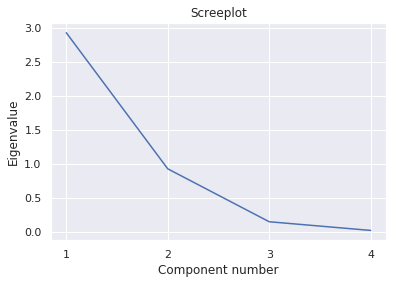

In [46]:
#Scree plot

#ticker is for X-axis
import matplotlib.ticker as ticker
plt.clf()

#generate blank figure (contains figure and axes)
fig1, ax1 = plt.subplots()

ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

Number of PCs to extract: 
- By Kaiser's Rule, extract the 1st PC whose eigenvalue is 2.9304 which is greater than 1.
- First 2 PCs already accounted for 95.80% of total variance, second PC accounts for 23.03% of total variance.
- Screeplot shows elbow at PC3; Suggesting 2 PCs to extract.

Hence, first 2 PCs (PC1 & PC2) are extracted.

In [47]:
#Extract only the two PCs (FOREVER 2 PCS FOR LOADING PLOT)

#cannot reuse "pca" variables because we want to keep 2 PCs instead of 7
pca2 = PCA(n_components=2).fit(data_reduced)

#take pca2 object, transfrom -> genereate scores based on CENTERED DATA
scores2 = pca2.transform(data_reduced)

In [48]:
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function.
# This function returns the axes of the loading plot

def loadingplot(data, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.07

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.05, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)
    
    return ax

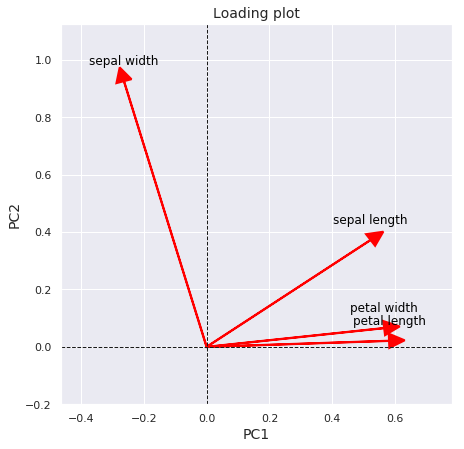

In [49]:
plt.clf
ax2 = loadingplot(data_reduced, pca2, width=7, height=7, margin=0.2)
plt.show()

#### (d)  Comment on how the irises can be distinguished and identified after PCA. 

In [50]:
#Obtain scores from original data that are not centred

scores2_notcentred = np.dot(data_reduced, pca2.components_.T)
scores2_notcentred = pd.DataFrame(scores2_notcentred, columns = ['PC1', 'PC2'])
scores2_notcentred.head()

#these scores are used to plot 'scoreplot' datapoints 

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [31]:
def scoreplot_label(data, scores, pca, width=5, height=5, margin=0.5):
    plt.figure(figsize=(width, height))
    #scores -> uncentred scores 
    ax = sns.scatterplot(x="PC1", y="PC2", data = scores, hue=data['class'])
    
    #Set limits for figure
    x_min = min(scores['PC1'].min(),0)-margin
    x_max = max(scores['PC1'].max(),0)+margin
    y_min = min(scores['PC2'].min(),0)-margin
    y_max = max(scores['PC2'].max(),0)+margin
  
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    return ax

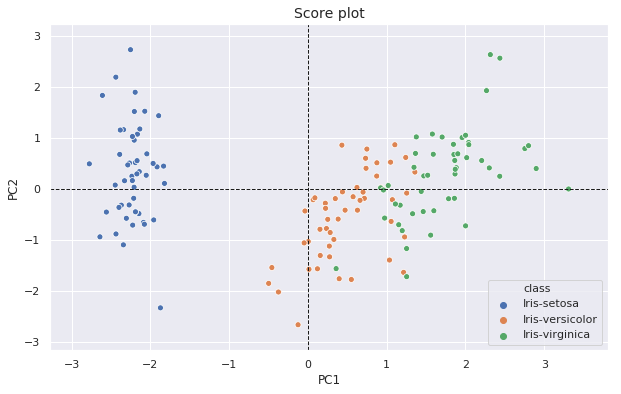

In [35]:
#Score plot 
plt.clf

#data is called for the labels
ax3=scoreplot_label(data,scores2_notcentred,pca2, width=10, height=6, margin=0.5)
plt.show()